In [2]:
import tensorflow as tf


In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [4]:
(train_data,train_label),(test_data,test_label) = fashion_mnist.load_data()

In [28]:
fashion_mnist_labels = [
    "T-shirt/top",  # 0
    "Trouser",      # 1
    "Pullover",     # 2
    "Dress",        # 3
    "Coat",         # 4
    "Sandal",       # 5
    "Shirt",        # 6
    "Sneaker",      # 7
    "Bag",          # 8
    "Ankle boot"    # 9
]

In [5]:
import numpy  as np
np.max(train_data[0])

255

In [6]:
train_data

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
import matplotlib.pyplot as plt

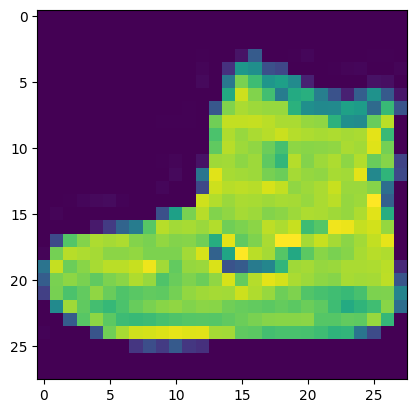

In [8]:
plt.imshow(train_data[0])

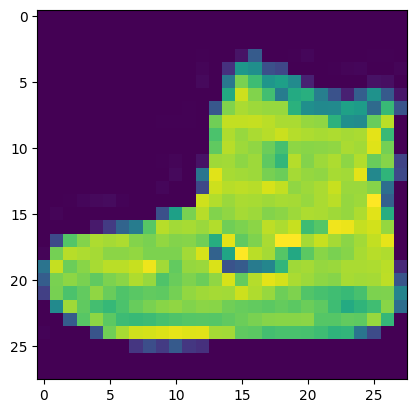

In [9]:
plt.imshow(train_data[0])

In [10]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
train_data.shape

(60000, 28, 28)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28,28,1)),
    tf.keras.layers.Rescaling(1/255),
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10,activation='softmax')
])

In [13]:
loss = tf.keras.losses.SparseCategoricalCrossentropy()

In [14]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [15]:
import time

In [20]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',restore_best_weights=True,patience=3,mode='min',verbose=1)

In [21]:
model.fit(train_data,train_label,epochs=5,batch_size=32,validation_split=0.2,callbacks=[early_stopping])

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8953 - loss: 0.2975 - val_accuracy: 0.9040 - val_loss: 0.2678
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.8997 - loss: 0.2877 - val_accuracy: 0.9009 - val_loss: 0.2672
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9036 - loss: 0.2715 - val_accuracy: 0.9035 - val_loss: 0.2597
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9069 - loss: 0.2616 - val_accuracy: 0.9101 - val_loss: 0.2440
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9104 - loss: 0.2522 - val_accuracy: 0.9143 - val_loss: 0.2347
Restoring model weights from the end of the best epoch: 5.


In [22]:
pred = model.predict(test_data)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [24]:
pred.argmax(axis=1)

10000

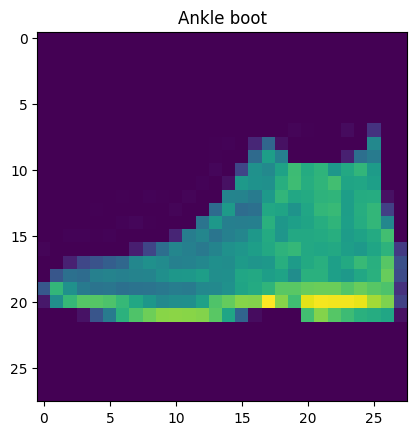

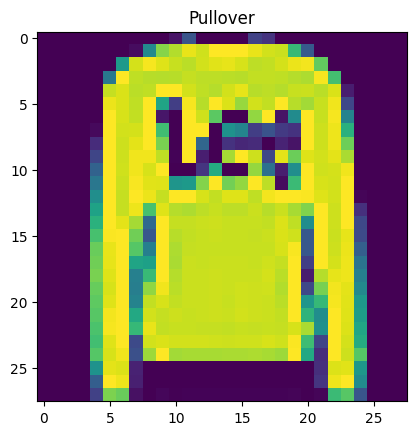

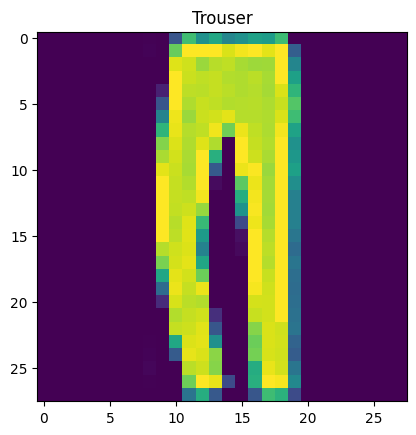

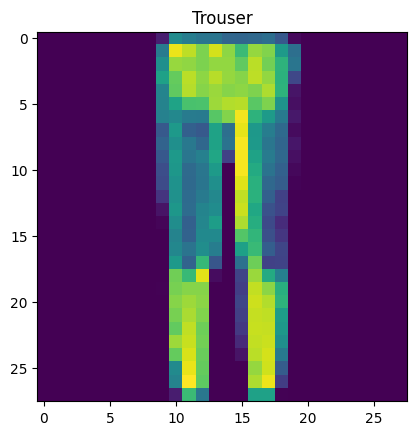

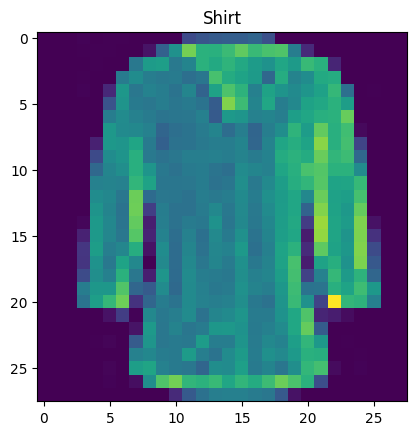

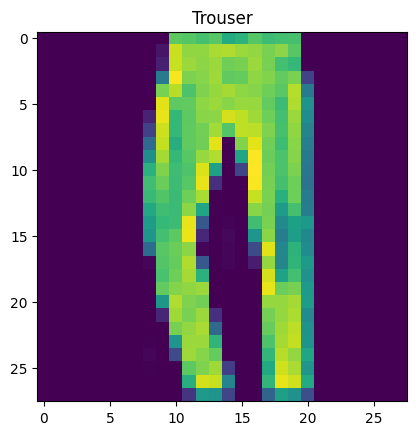

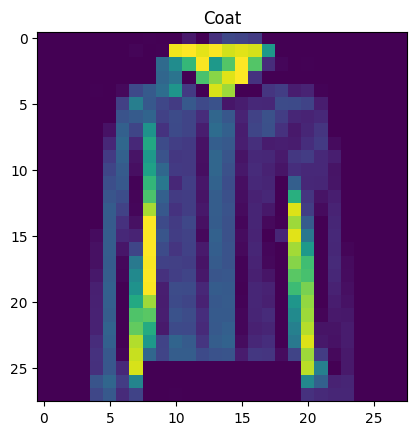

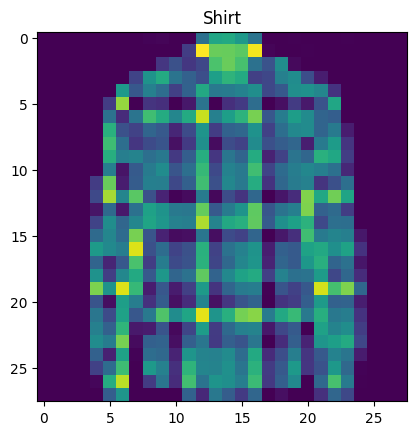

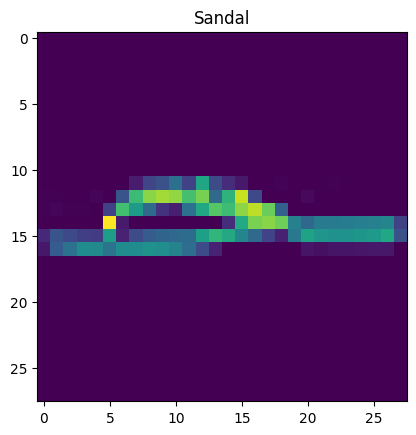

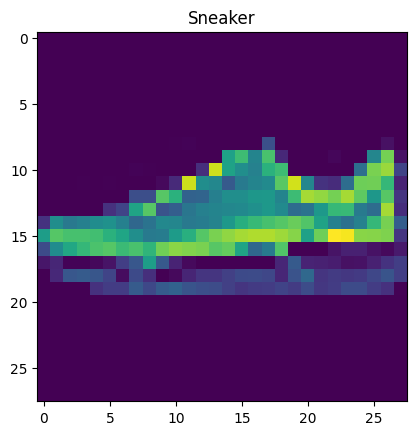

In [34]:
for i in range(10):
    plt.title(fashion_mnist_labels[np.argmax(pred[i])])
    plt.imshow(test_data[i])
    plt.show()

In [35]:
pred_y = np.argmax(pred,axis=1)

In [36]:
pred_y

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [37]:
test_label

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(test_label,pred_y)

0.9066

Hyperparameter tuning

In [ ]:
def create_model():
    pass